# Post pruning decision trees with cost complexity pruning

The class: DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In class: DecisionTreeClassifier this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
data = load_breast_cancer()
x, y = data.data, data.target

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=0)

In [3]:
ypred = clf.predict(xtest)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)

print(f'{cm}\n {cr}\n Accuracy{ac}')

[[59  4]
 [11 97]]
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        63
           1       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171

 Accuracy0.9122807017543859


[Text(0.7309782608695652, 0.9375, 'X[27] <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [149, 249]'),
 Text(0.592391304347826, 0.8125, 'X[23] <= 952.9\ngini = 0.147\nsamples = 263\nvalue = [21, 242]'),
 Text(0.44565217391304346, 0.6875, 'X[13] <= 35.26\ngini = 0.077\nsamples = 250\nvalue = [10, 240]'),
 Text(0.2826086956521739, 0.5625, 'X[27] <= 0.136\ngini = 0.034\nsamples = 232\nvalue = [4, 228]'),
 Text(0.17391304347826086, 0.4375, 'X[14] <= 0.003\ngini = 0.018\nsamples = 226\nvalue = [2, 224]'),
 Text(0.08695652173913043, 0.3125, 'X[14] <= 0.003\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.043478260869565216, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.13043478260869565, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2608695652173913, 0.3125, 'X[21] <= 32.78\ngini = 0.009\nsamples = 219\nvalue = [1, 218]'),
 Text(0.21739130434782608, 0.1875, 'gini = 0.0\nsamples = 202\nvalue = [0, 202]'),
 Text(0.30434782608695654, 0.1875, 'X[21] <= 33.805\ngin

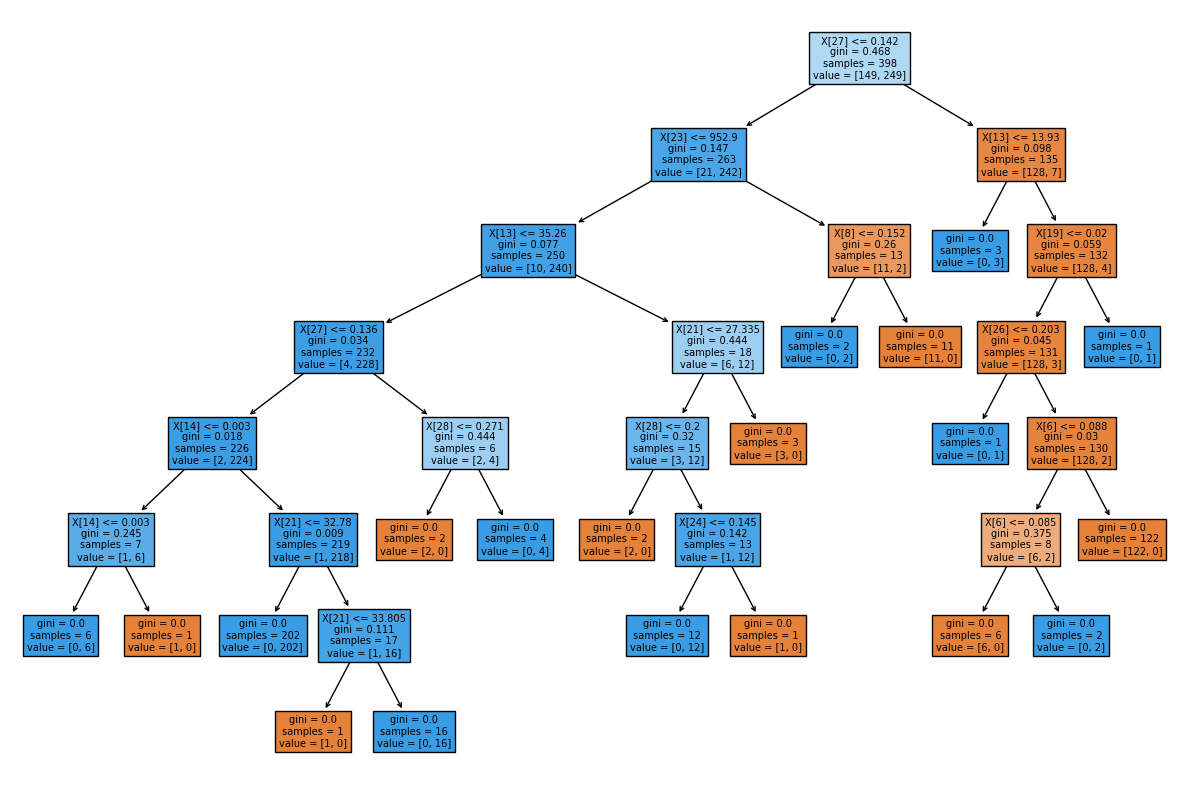

In [4]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [5]:
path = clf.cost_complexity_pruning_path(xtrain,ytrain)
ccp_alphas, impurities = path.ccp_alphas,path.impurities

In [6]:
ccp_alphas

array([0.        , 0.00249033, 0.00463858, 0.00487285, 0.00489632,
       0.00742172, 0.0080402 , 0.00838676, 0.00850406, 0.01386055,
       0.04035621, 0.33798172])

In [7]:
# Initialize an empty list to store DecisionTreeClassifier instances
clfs = []

# Iterate over different ccp_alpha values and train DecisionTreeClassifiers
for ccp_alpha in ccp_alphas:
    # Create a DecisionTreeClassifier with the current ccp_alpha value
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    
    # Train the classifier on the training data
    clf.fit(xtrain, ytrain)
    
    # Append the trained classifier to the list
    clfs.append(clf)

# Get the number of nodes in the last tree and the corresponding ccp_alpha value
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3379817186504386


# Accuracy vs alpha for training and testing sets

Best CCP: 0.01386054853391537


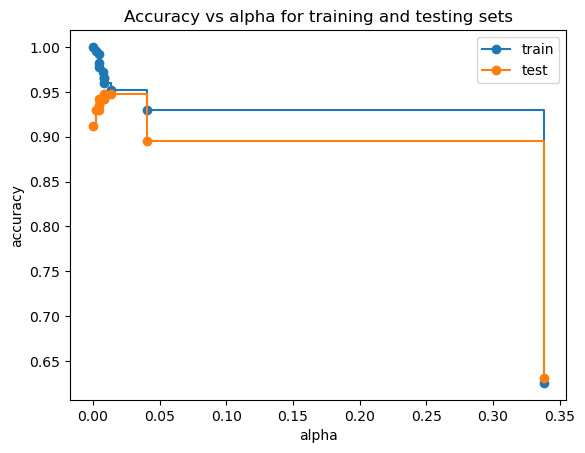

In [8]:
# Calculate the train and test scores for each classifier
train_scores = [clf.score(xtrain, ytrain) for clf in clfs]
test_scores = [clf.score(xtest, ytest) for clf in clfs]

# Find the best ccp_alpha that gives train accuracy > 0.90 and smallest difference between train and test scores
best_ccp = None
temp = 200000000000000
for i in range(len(ccp_alphas)):
    if train_scores[i] > 0.90:
        if abs(train_scores[i] - test_scores[i]) < temp:
            temp = abs(train_scores[i] - test_scores[i])
            best_ccp = ccp_alphas[i]

print("Best CCP:", best_ccp)

# Plot the accuracy vs. alpha for training and testing sets
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [9]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=best_ccp)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.01386054853391537, random_state=0)

In [10]:
ypred = clf.predict(xtest)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)

print(f'{cm}\n {cr}\n Accuracy{ac}')

[[ 60   3]
 [  6 102]]
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        63
           1       0.97      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

 Accuracy0.9473684210526315


[Text(0.6, 0.8333333333333334, 'X[27] <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [149, 249]'),
 Text(0.4, 0.5, 'X[23] <= 952.9\ngini = 0.147\nsamples = 263\nvalue = [21, 242]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.077\nsamples = 250\nvalue = [10, 240]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.8, 0.5, 'gini = 0.098\nsamples = 135\nvalue = [128, 7]')]

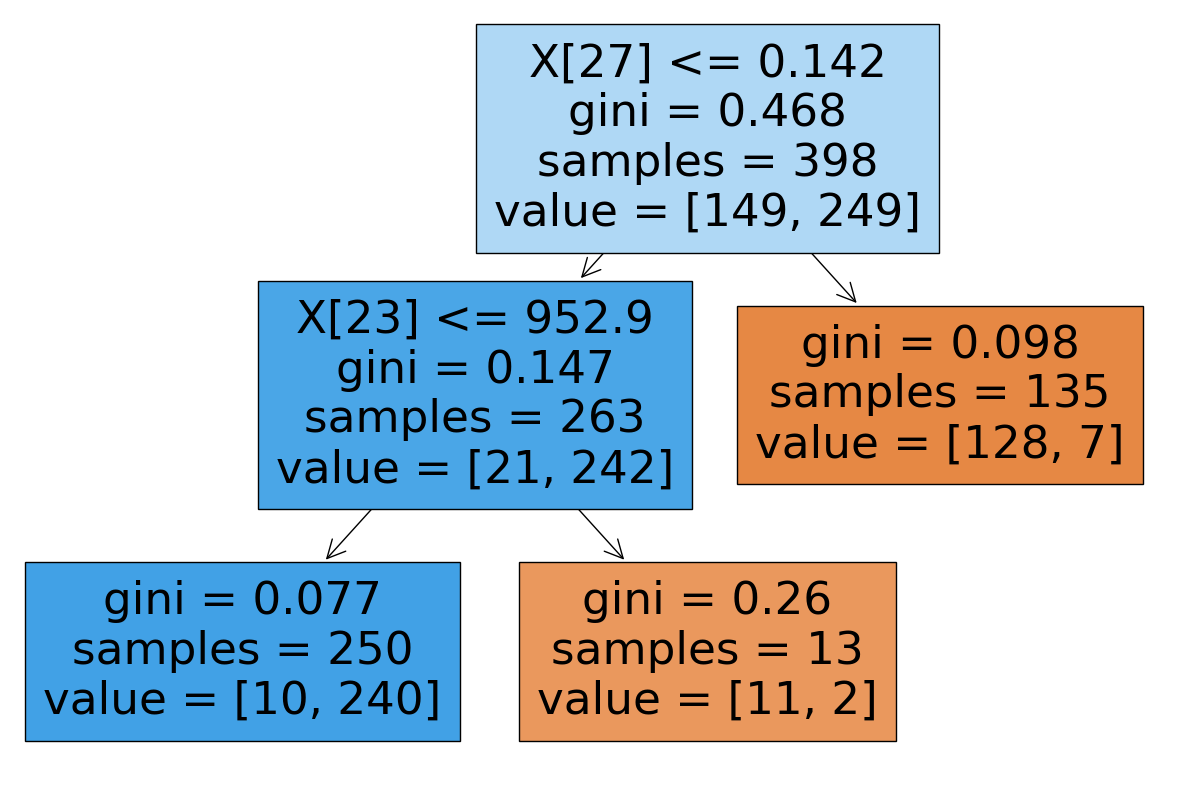

In [11]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)